In [2]:
# steps in Data Preprocessing :
# 1.import all respective libraries
# 2.upload the dataset
# 3.sanity check of the data
# 4.Exploratory data analysis
# 5.Missing value treatement
# 6.Outlier Treatement
# 7.Dublicate value and Garbage value treatement
# 8.Normalization
# 9.Encoding of data

In [3]:
#1.Importing all respective libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.feature_selection import SelectKBest,chi2,f_classif

In [4]:
#uploading file
df = pd.read_csv(r'C:\Users\thakk\OneDrive\Documents\Infosys springboard\Cereberal_Dataset.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [5]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0
43399,36271,Female,82.0,0,0,Yes,Private,Urban,79.48,20.6,never smoked,0


In [6]:
#Sanity Check of the data

In [7]:
df.shape
print(f'rows : {df.shape[0]}')
print(f'columns : {df.shape[1]}')

rows : 43400
columns : 12


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [9]:
# Finding Missing value :

In [10]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [11]:
#percentage : 
(df.isnull().sum()/df.shape[0])*100
#if the percentage is more than 50% we can drop the whole column 

id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.368664
smoking_status       30.626728
stroke                0.000000
dtype: float64

In [12]:
#Treating Missing values :

In [13]:
warnings.filterwarnings('ignore')
df['bmi'].fillna(df['bmi'].mean(),inplace=True)
df['smoking_status'].fillna(df['smoking_status'].mode()[0],inplace=True)

In [14]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:
#finding Duplicate value

In [16]:
df.duplicated().sum()

0

In [17]:
# Identifying garbage values
# garbage value is always in the form of object type
for i in df.select_dtypes(include='object').columns:
    print( df[i].value_counts() )
    print('***'*10)

gender
Female    25665
Male      17724
Other        11
Name: count, dtype: int64
******************************
ever_married
Yes    27938
No     15462
Name: count, dtype: int64
******************************
work_type
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: count, dtype: int64
******************************
Residence_type
Urban    21756
Rural    21644
Name: count, dtype: int64
******************************
smoking_status
never smoked       29345
formerly smoked     7493
smokes              6562
Name: count, dtype: int64
******************************


In [18]:
#Exploratory Data Analysis(EDA)

In [19]:
#descriptive Analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,43400.0,36326.142350,21072.134879,1.00,18038.50,36351.50,54514.25,72943.00
age,43400.0,42.217894,22.519649,0.08,24.00,44.00,60.00,82.00
hypertension,43400.0,0.093571,0.291235,0.00,0.00,0.00,0.00,1.00
heart_disease,43400.0,0.047512,0.212733,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,43400.0,104.482750,43.111751,55.00,77.54,91.58,112.07,291.05
bmi,43400.0,28.605038,7.638023,10.10,23.40,28.10,32.60,97.60
stroke,43400.0,0.018041,0.133103,0.00,0.00,0.00,0.00,1.00


In [20]:
df.describe(include='object').T

,count,unique,top,freq
gender,43400,3,Female,25665
ever_married,43400,2,Yes,27938
work_type,43400,5,Private,24834
Residence_type,43400,2,Urban,21756
smoking_status,43400,3,never smoked,29345


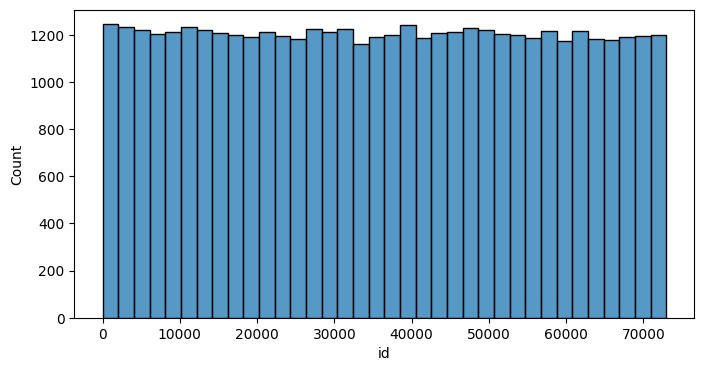

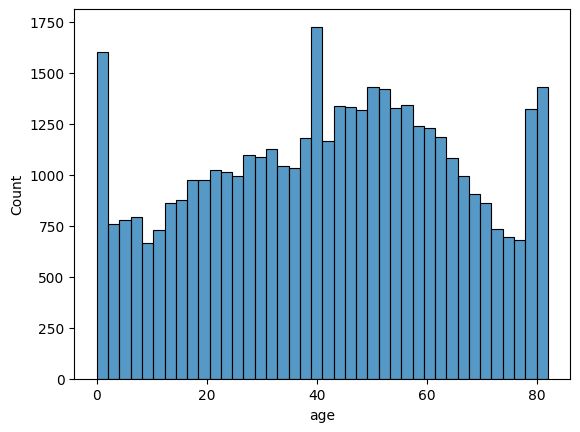

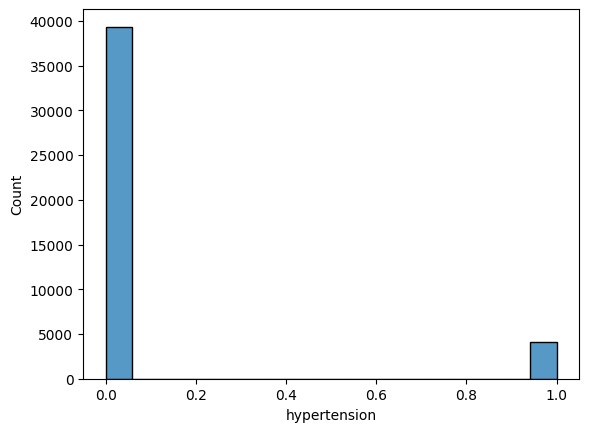

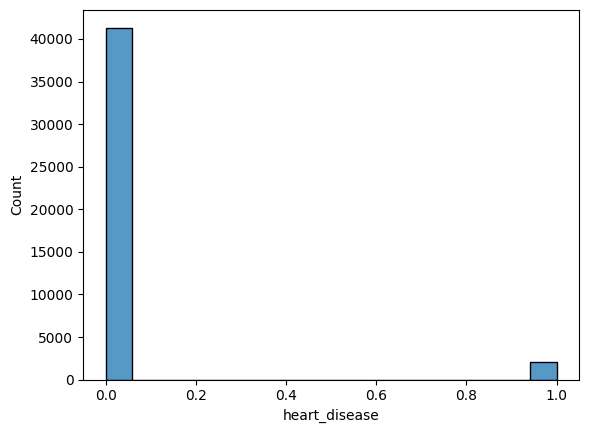

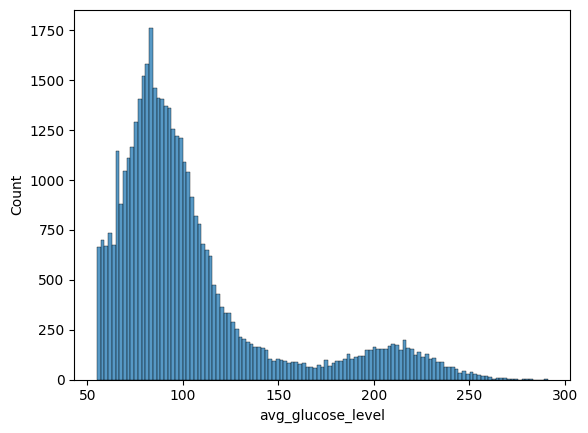

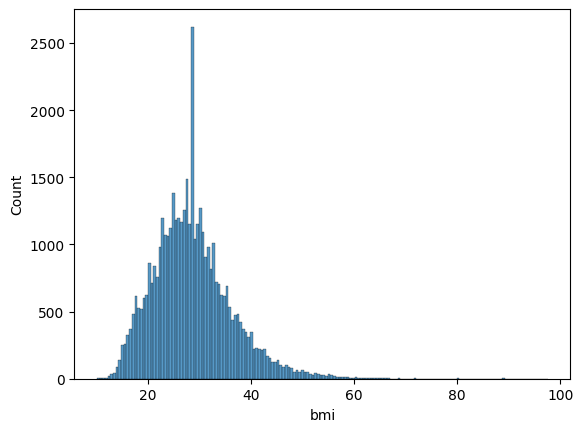

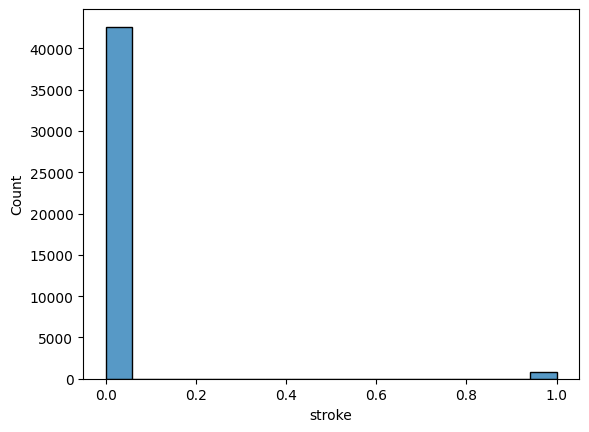

In [21]:
#histogram to understand the distribution of Data

#to ignore errors :
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=[8,4])

#for each column of number type histogram
for i in df.select_dtypes(include='number').columns:
    sns.histplot(data=df,x=i)
    plt.show()

In [22]:
#BoxPlot for identifying the outliers :

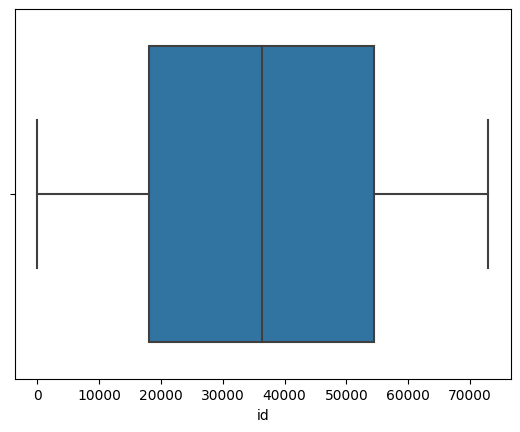

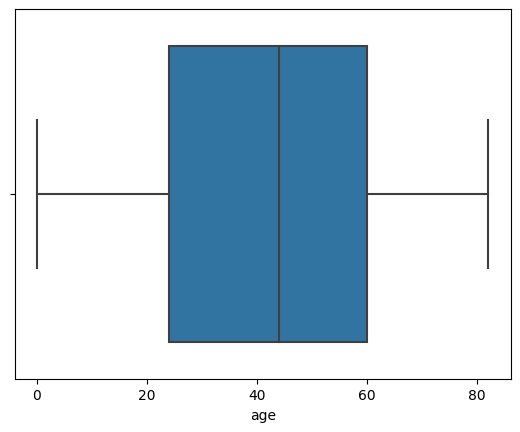

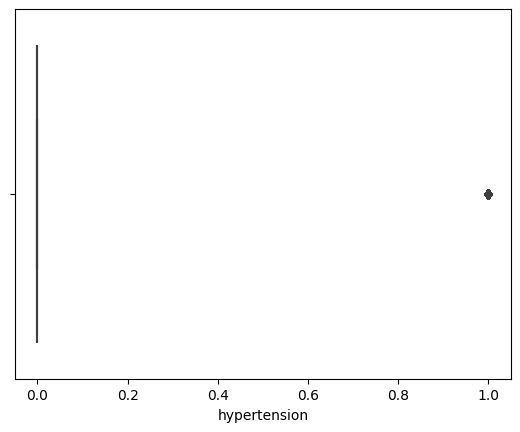

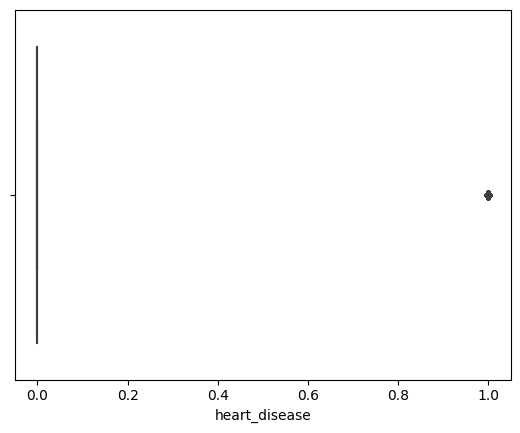

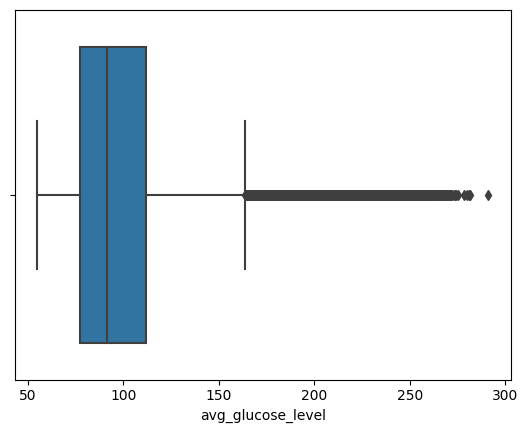

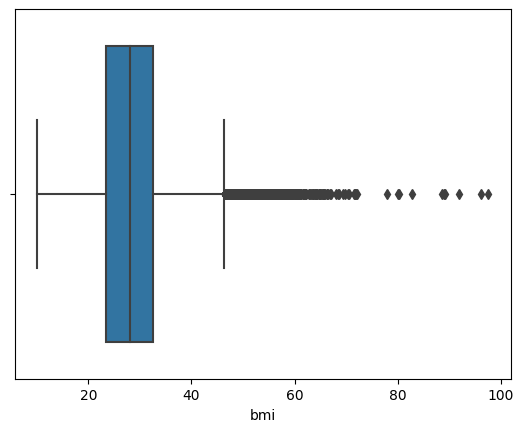

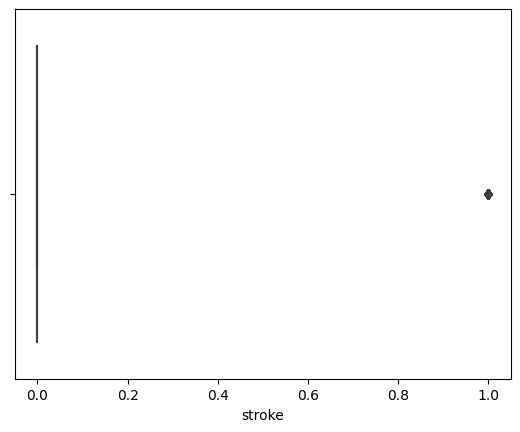

In [23]:
import warnings
warnings.filterwarnings('ignore')

#boxplot for the number data columns
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [24]:
#avg_glucose_level
#25%
a= 77.54
#50% 
b= 91.58
#75% 
c= 112.07
interq = c+1.5*(c-a)
print(interq)

163.86499999999998


In [25]:
#bmi
#25%
a=23.40	
#50% 
b= 28.10	
#75% 
c= 32.06
interq = c+1.5*(c-a)
print(interq)

45.05000000000001


In [26]:
def wisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr=q3-q1
    lw = q1-1.5*iqr
    uw = q3+1.5*iqr
    return lw,uw

In [27]:
wisker(df['avg_glucose_level'])

(25.745000000000026, 163.86499999999998)

In [28]:
wisker(df['bmi'])

(9.599999999999994, 46.400000000000006)

In [29]:
df.select_dtypes(include='number').columns
for i in ['bmi','avg_glucose_level']:
    lw,uw = wisker(df[i])
    df[i] = np.where(df[i]<lw,lw,df[i])
    df[i] = np.where(df[i]>uw,uw,df[i])

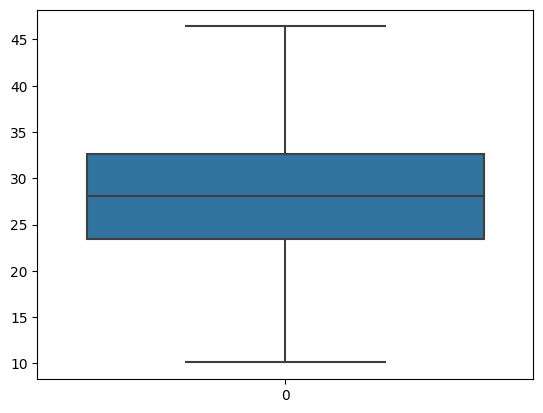

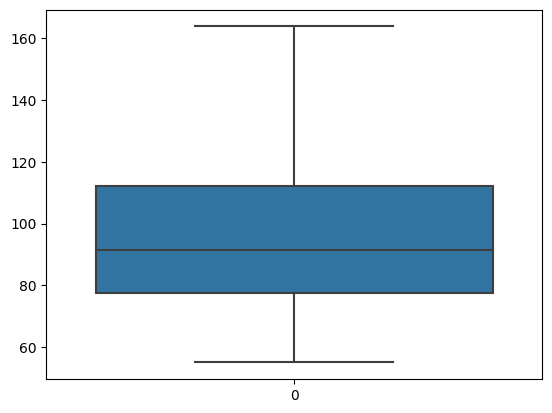

In [30]:
for i in ['bmi','avg_glucose_level']:
    sns.boxplot(df[i])
    plt.show()

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,43400.0,36326.142350,21072.134879,1.00,18038.50,36351.50,54514.25,72943.000
age,43400.0,42.217894,22.519649,0.08,24.00,44.00,60.00,82.000
hypertension,43400.0,0.093571,0.291235,0.00,0.00,0.00,0.00,1.000
heart_disease,43400.0,0.047512,0.212733,0.00,0.00,0.00,0.00,1.000
avg_glucose_level,43400.0,99.394985,30.752072,55.00,77.54,91.58,112.07,163.865
bmi,43400.0,28.463465,7.182613,10.10,23.40,28.10,32.60,46.400
stroke,43400.0,0.018041,0.133103,0.00,0.00,0.00,0.00,1.000


In [32]:
#observation : 
#1.before treating outlies the bmi (min_value = 10.10, max_value=97.60)
#1.After treating outlies the bmi (min_value = 10.10, max_value=46.400)
#3.before treating outlies the avg_glucose_level (min_value = 55.00, max_value=291.05)
#3.After treating outlies the avg_glucose_level (min_value = 55.00, max_value=163.865)

In [33]:
#Scatter plot to understand the relation between the independent and target variable

In [34]:
num_columns = df.select_dtypes(include='number').columns
print(num_columns)

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')


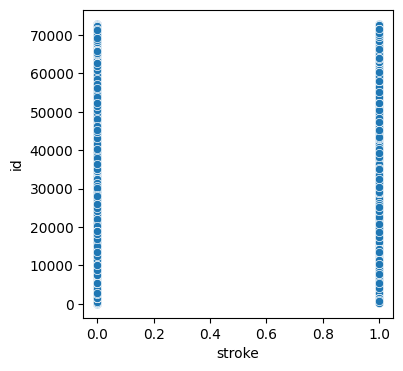

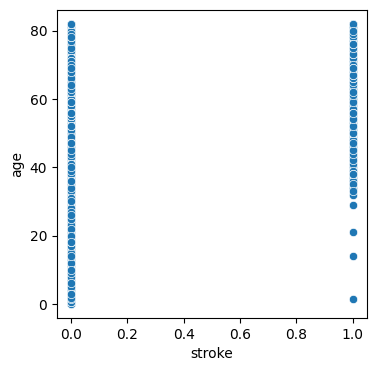

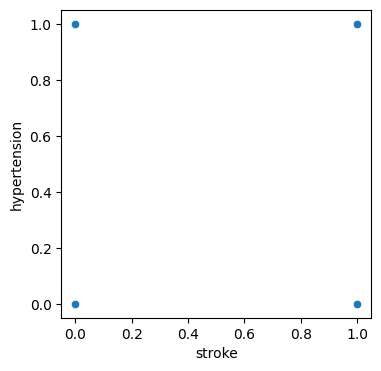

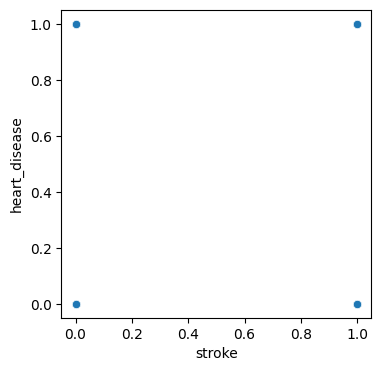

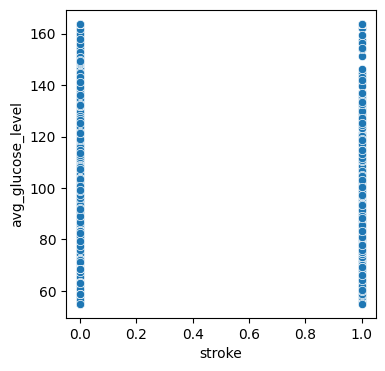

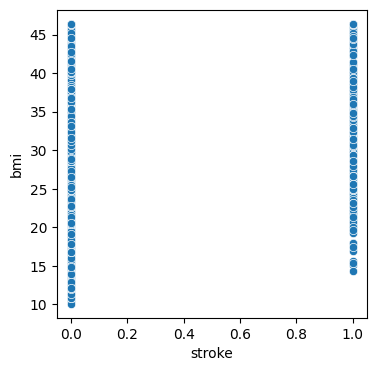

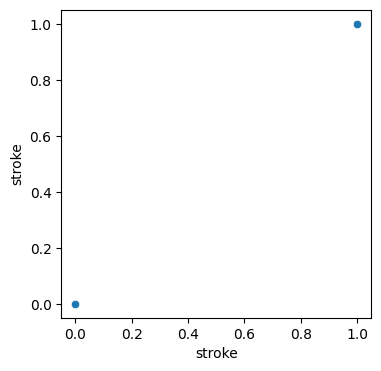

In [35]:
for i in df.select_dtypes(include='number').columns:
    plt.figure(figsize=[4,4])
    sns.scatterplot(data=df,y=i,x='stroke')
    plt.show()

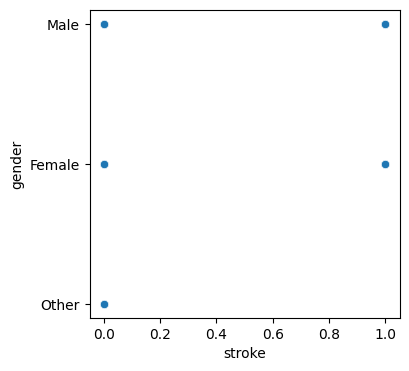

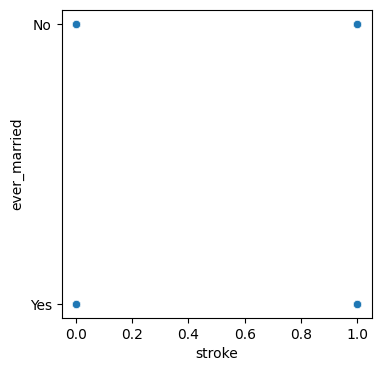

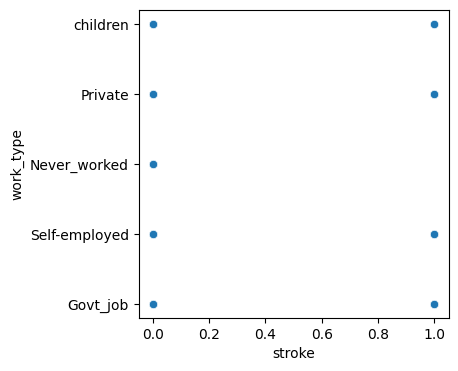

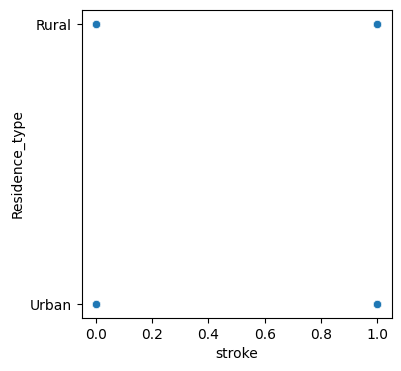

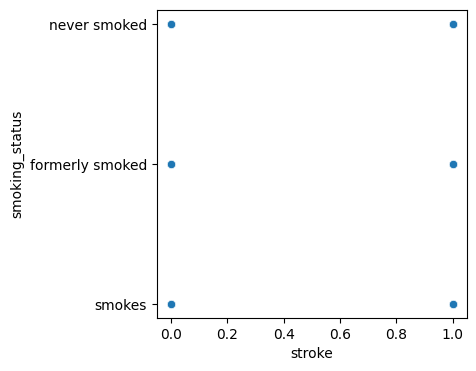

In [36]:
for i in df.select_dtypes(include='object').columns:
    plt.figure(figsize=[4,4])
    sns.scatterplot(data=df,y=i,x='stroke')
    plt.show()

In [37]:
#correlation with heatmap to interpret the relation and multicolliniarity
s=df.select_dtypes(include='number').corr()

<Axes: >

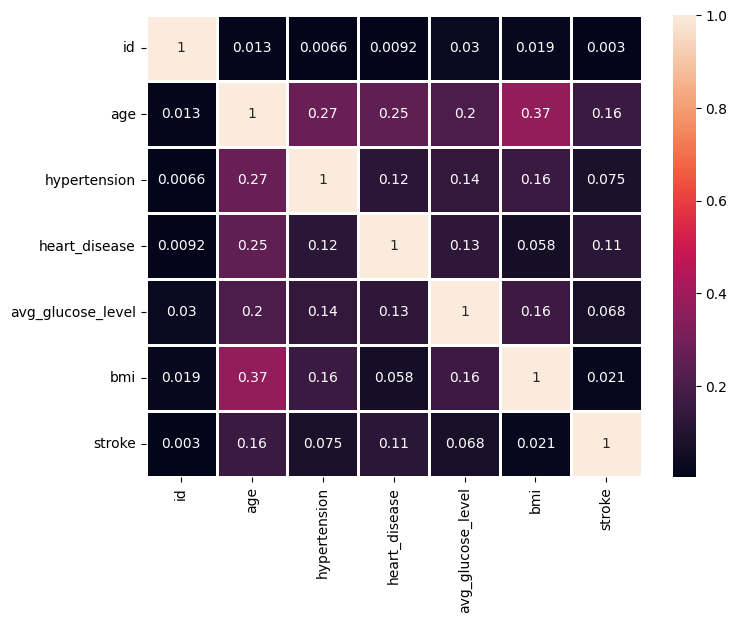

In [39]:
plt.figure(figsize=[8,6])
sns.heatmap(s,annot=True,linewidth=1)

In [40]:
num_columns = df.select_dtypes(include='number').columns
print(num_columns)

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')


In [41]:
cat_columns = df.select_dtypes(include='object').columns
print(cat_columns)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [42]:
df= df.drop(columns='id',axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.120,18.0,never smoked,0
1,Male,58.0,1,0,Yes,Private,Urban,87.960,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.890,17.6,never smoked,0
3,Female,70.0,0,0,Yes,Private,Rural,69.040,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.280,19.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.640,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,163.865,46.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.940,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.160,33.2,never smoked,0


In [43]:
#performing one hot encoding

In [44]:
one_hot_encoded_data = pd.get_dummies(df, columns=cat_columns , drop_first=True)


In [45]:
df = one_hot_encoded_data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.select_dtypes(include='bool').columns:
    df[i] = df[i].apply(lambda x: 1 if x == True else 0)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,3.0,0,0,95.12,18.0,0,1,0,0,0,0,0,1,0,1,0
1,58.0,1,0,87.96,39.2,0,1,0,1,0,1,0,0,1,1,0
2,8.0,0,0,110.89,17.6,0,0,0,0,0,1,0,0,1,1,0
3,70.0,0,0,69.04,35.9,0,0,0,1,0,1,0,0,0,0,0
4,14.0,0,0,161.28,19.1,0,1,0,0,1,0,0,0,0,1,0


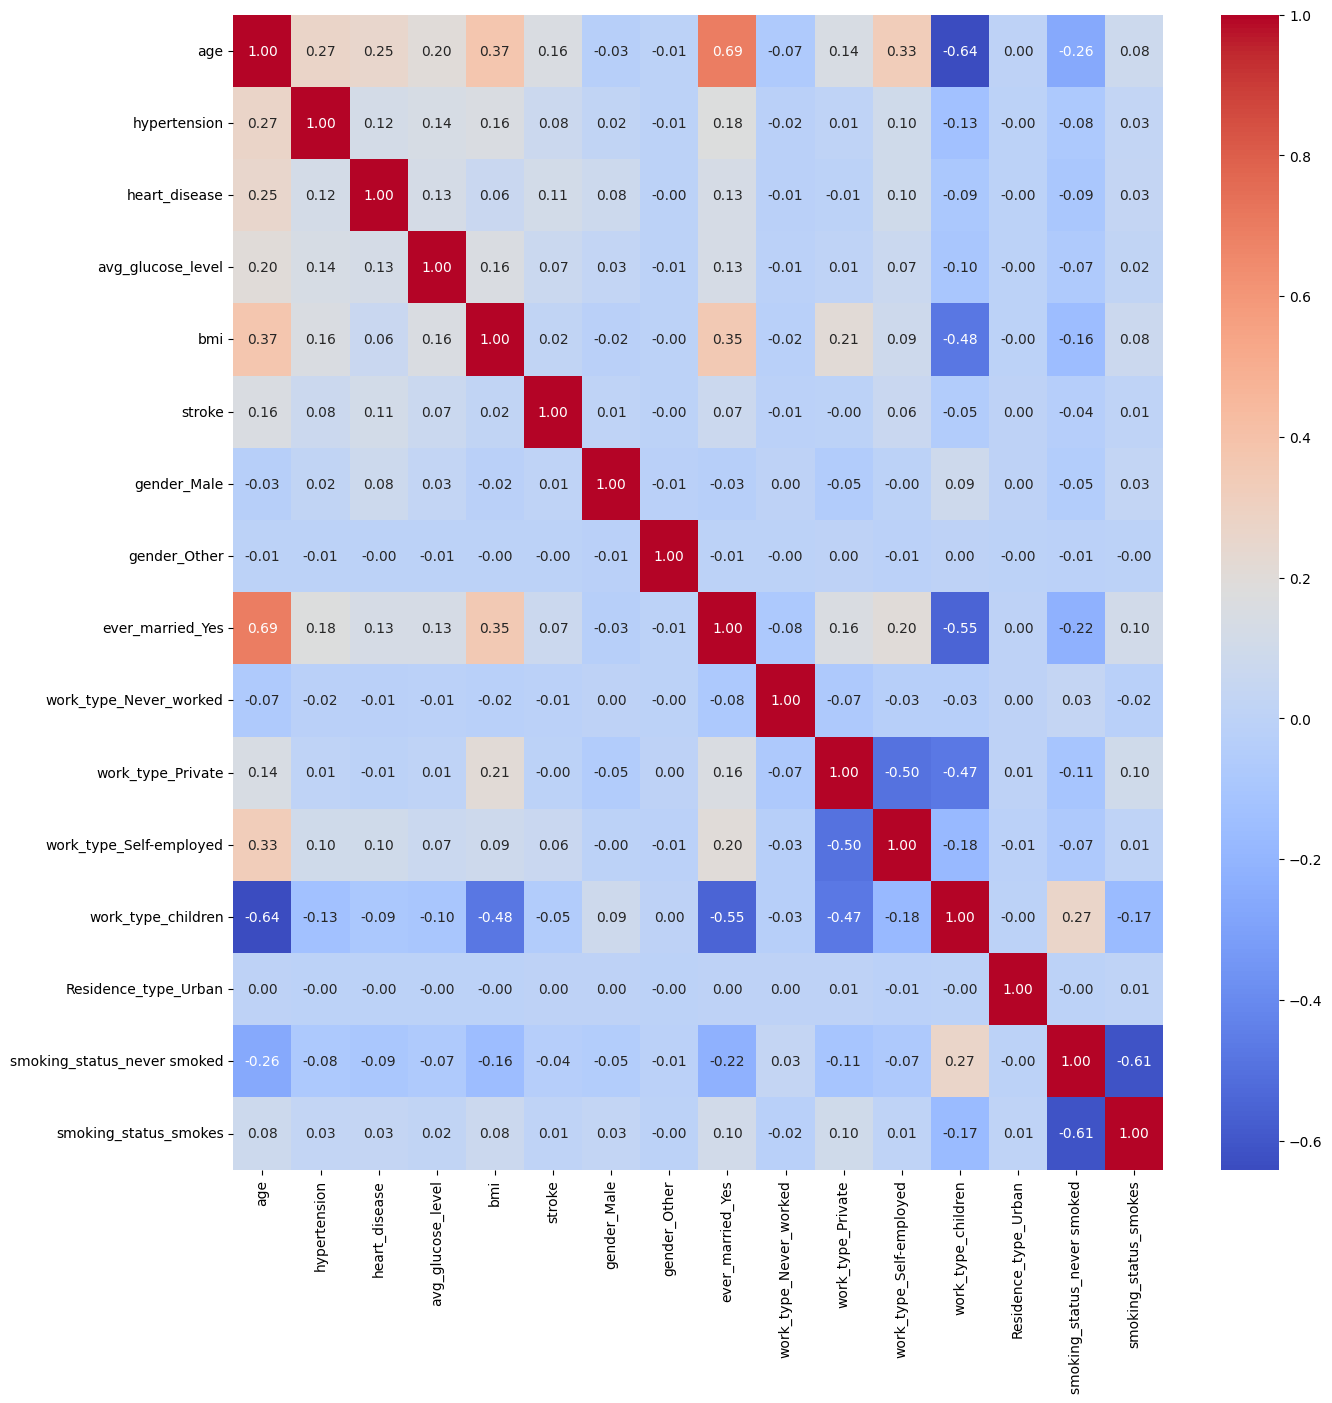

In [46]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [47]:
data = df

In [48]:
#feature selection : Filter method

In [49]:
x = df.drop('stroke',axis=1)
y = df['stroke']

In [50]:
bestfeature = SelectKBest(score_func=chi2,k=10)
fit = bestfeature.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
feature_scores.columns=['feature','Score']
print(feature_scores.nlargest(10,'Score'))

                        feature         Score
0                           age  12694.866899
3             avg_glucose_level   1892.148575
2                 heart_disease    534.996642
1                  hypertension    223.246768
10      work_type_Self-employed    137.089006
11           work_type_children    109.067064
7              ever_married_Yes     79.975909
4                           bmi     35.547320
13  smoking_status_never smoked     19.400027
5                   gender_Male      3.308811


In [51]:
bestfeature1 = SelectKBest(score_func=f_classif,k=10)
fit1 = bestfeature.fit(x,y)
dfscores1 = pd.DataFrame(fit1.scores_)
dfcolumns1 = pd.DataFrame(x.columns)
feature_scores1 = pd.concat([dfcolumns1, dfscores1], axis=1)
feature_scores1.columns=['feature','Score']
topfeatures = feature_scores1.nlargest(10,'Score')
topfeatures

,feature,Score
0,age,12694.866899
3,avg_glucose_level,1892.148575
2,heart_disease,534.996642
1,hypertension,223.246768
10,work_type_Self-employed,137.089006
11,work_type_children,109.067064
7,ever_married_Yes,79.975909
4,bmi,35.547320
13,smoking_status_never smoked,19.400027
5,gender_Male,3.308811


In [52]:
best_col = list(topfeatures['feature'])
best_col

['age',
 'avg_glucose_level',
 'heart_disease',
 'hypertension',
 'work_type_Self-employed',
 'work_type_children',
 'ever_married_Yes',
 'bmi',
 'smoking_status_never smoked',
 'gender_Male']

In [53]:
#balancing the data

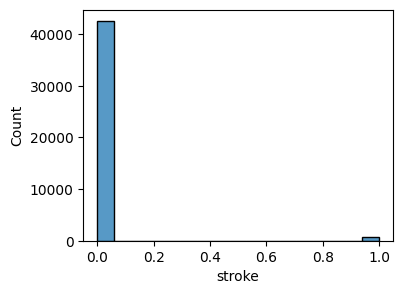

In [54]:
plt.figure(figsize=(4,3))
sns.histplot(df['stroke'])
plt.show()

In [55]:
stroke = df[df['stroke']==1]
non_stroke = df[df['stroke']==0]
print(stroke.shape,non_stroke.shape)

(783, 16) (42617, 16)


In [56]:
# observation : 
# 0 are more which means no stroke people are more around 42617
# 1 are 783
# it is a highly imbalanced data

In [57]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [58]:
oversample = RandomOverSampler(sampling_strategy='minority')
x_res, y_res = oversample.fit_resample(x, y)
print("Original data :",Counter(y))
print("Balanced data :", Counter(y_res))

Original data : Counter({0: 42617, 1: 783})
Balanced data : Counter({0: 42617, 1: 42617})


In [59]:
print(x_res.shape)
print(y_res.shape)

(85234, 15)
(85234,)


In [60]:
# RandomOverSampler: Add the Random copies to the minorities class(non_stroke(1)) with respect to the target variable 
# It add copies until the ratio become 1:1

In [61]:
#Data Spliting (7:3)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.3,random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (59663, 15)
x_test : (25571, 15)
y_train : (59663,)
y_test : (25571,)


In [64]:
#Observation :
# using train_test_split library spliting the data into 70%, 30% for train and test in two balance datasets such as x_res and y_res
#train data is given to model for model training
#test data is used for the prediction, the predictions done by model on test data with respect to train data give accuracy

In [65]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [67]:
accuracy = {}

In [68]:
lr_model = LogisticRegression(random_state=2)
lr_model.fit(x_train,y_train) #Training the model

LogisticRegression(random_state=2)

In [69]:
y_pred = lr_model.predict(x_test) #from x testing data model will generate label's
model_accuracy = accuracy_score(y_test,y_pred)
accuracy[str(lr_model)]=model_accuracy*100
print(model_accuracy)

0.7815103046419772


<Axes: >

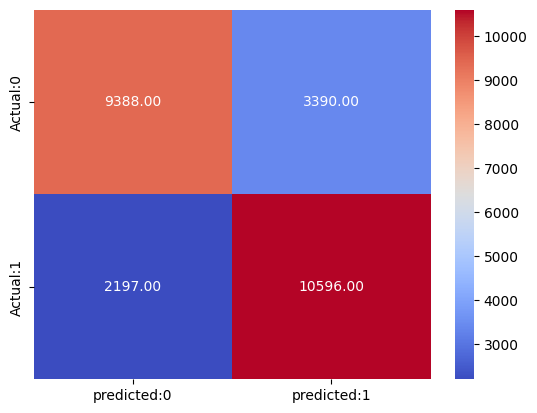

In [70]:
cm = confusion_matrix(y_test,y_pred)
con_matrix = pd.DataFrame(data=cm,columns=['predicted:0','predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(con_matrix,annot=True,fmt='.2f',cmap='coolwarm')

In [202]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.80      0.73      0.77     12778\n           1       0.75      0.82      0.78     12793\n\n    accuracy                           0.78     25571\n   macro avg       0.78      0.78      0.78     25571\nweighted avg       0.78      0.78      0.78     25571\n'

In [71]:
# total 1 : 12793
# total 0 : 12778
tp = 10596
tn = 9388
fp = 3390
fn = 2197
p=(tp/(tp+fp))*100
r=(tp/(tp+fn))*100
print('precision = ',(tp/(tp+fp))*100)#Precision is the ratio of true positive predictions to the total predicted positives. It measures the accuracy of positive predictions made by the model.
print('recall = ',(tp/(tp+fn))*100)#recall is the ratio of true positive to the acutal positives.
print('f1_score = ',2*((p*r)/(p+r)))#The F1 score is particularly useful when you need to account for both false positives and false negatives 

precision =  75.76147576147577
recall =  82.82654576721644
f1_score =  79.1366369169872


In [72]:
test = pd.DataFrame({'Actual':y_test,'Model_Predicted':y_pred})
test.head(10)

,Actual,Model_Predicted
43931,1,1
77120,1,1
82858,1,1
13212,0,1
16460,0,0
2820,0,0
29567,0,0
74008,1,1
58979,1,1
11985,0,0


In [73]:
#DecisionTree Model Building

In [74]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
dt_pred = dt_model.predict(x_test)
dt_accuracy=accuracy_score(y_test,dt_pred)
accuracy[str(dt_model)]=dt_accuracy*100
print(dt_accuracy)

0.9875249305854288


<Axes: >

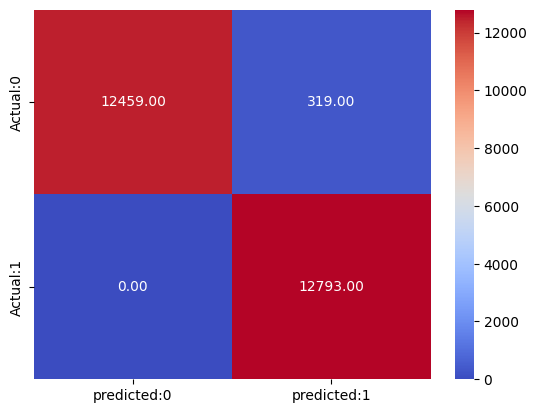

In [75]:
cm2 = confusion_matrix(y_test,dt_pred)
con_matrix2 = pd.DataFrame(data=cm2,columns=['predicted:0','predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(con_matrix2,annot=True,fmt='.2f',cmap='coolwarm')

In [76]:
classification_report(y_test,dt_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.98      0.99     12778\n           1       0.98      1.00      0.99     12793\n\n    accuracy                           0.99     25571\n   macro avg       0.99      0.99      0.99     25571\nweighted avg       0.99      0.99      0.99     25571\n'

In [77]:
# total 1 : 12793
# total 0 : 12778
minority_correct_pred = 12793/12793 * 100
print("minority class correct prediction : ",minority_correct_pred)
tp = 12793
tn = 12459
fp = 319
fn = 0
p=(tp/(tp+fp))*100
r=(tp/(tp+fn))*100
print('precision = ',(tp/(tp+fp))*100)
print('recall = ',(tp/(tp+fn))*100)
print('f1_score = ',2*((p*r)/(p+r)))

minority class correct prediction :  100.0
precision =  97.56711409395973
recall =  100.0
f1_score =  98.76857749469215


In [78]:
dt_test = pd.DataFrame({'Actual':y_test,'Model_Predicted':dt_pred})
dt_test.head(10)

,Actual,Model_Predicted
43931,1,1
77120,1,1
82858,1,1
13212,0,0
16460,0,0
2820,0,0
29567,0,0
74008,1,1
58979,1,1
11985,0,0


In [79]:
#RandomForest Classifier

In [80]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train,y_train)
rf_pred = rf_model.predict(x_test)
rf_accuracy=accuracy_score(y_test,rf_pred)
accuracy[str(rf_model)]=rf_accuracy*100
print(rf_accuracy)

0.9969105627468616


<Axes: >

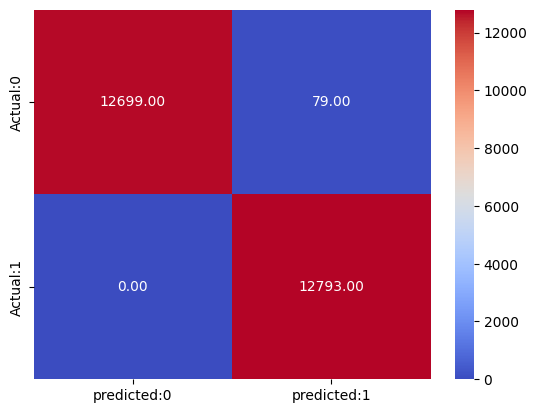

In [81]:
cm3 = confusion_matrix(y_test,rf_pred)
con_matrix3 = pd.DataFrame(data=cm3,columns=['predicted:0','predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(con_matrix3,annot=True,fmt='.2f',cmap='coolwarm')

In [82]:
classification_report(y_test,rf_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      1.00     12778\n           1       0.99      1.00      1.00     12793\n\n    accuracy                           1.00     25571\n   macro avg       1.00      1.00      1.00     25571\nweighted avg       1.00      1.00      1.00     25571\n'

In [83]:
# total 1 : 12793
# total 0 : 12778
minority_correct_pred = 12793/12793 * 100
print("minority class correct prediction : ",minority_correct_pred)
tp = 12793
tn = 12699
fp = 79
fn = 0
p=(tp/(tp+fp))*100
r=(tp/(tp+fn))*100
print('precision = ',(tp/(tp+fp))*100)
print('recall = ',(tp/(tp+fn))*100)
print('f1_score = ',2*((p*r)/(p+r)))

minority class correct prediction :  100.0
precision =  99.38626476072095
recall =  100.0
f1_score =  99.69218780440288


In [84]:
#KNN Model Building

In [85]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)
knn_pred = knn_model.predict(x_test)
knn_accuracy=accuracy_score(y_test,knn_pred)
accuracy[str(knn_model)]=knn_accuracy*100
print(knn_accuracy)

0.9642172773845372


In [86]:
rf_test = pd.DataFrame({'Actual':y_test,'Model_Predicted':rf_pred})
rf_test.head(10)

,Actual,Model_Predicted
43931,1,1
77120,1,1
82858,1,1
13212,0,0
16460,0,0
2820,0,0
29567,0,0
74008,1,1
58979,1,1
11985,0,0


<Axes: >

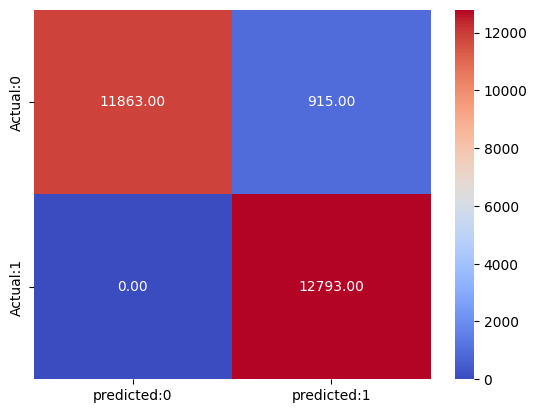

In [87]:
cm1 = confusion_matrix(y_test,knn_pred)
con_matrix1 = pd.DataFrame(data=cm1,columns=['predicted:0','predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(con_matrix1,annot=True,fmt='.2f',cmap='coolwarm')

In [88]:
classification_report(y_test,knn_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.93      0.96     12778\n           1       0.93      1.00      0.97     12793\n\n    accuracy                           0.96     25571\n   macro avg       0.97      0.96      0.96     25571\nweighted avg       0.97      0.96      0.96     25571\n'

In [89]:
# total 1 : 12793
# total 0 : 12778
minority_correct_pred = 12793/12793 * 100
print("minority class correct prediction : ",minority_correct_pred)
tp = 12793
tn = 11863
fp = 915
fn = 0
p=(tp/(tp+fp))*100
r=(tp/(tp+fn))*100
print('precision = ',(tp/(tp+fp))*100)
print('recall = ',(tp/(tp+fn))*100)
print('f1_score = ',2*((p*r)/(p+r)))

minority class correct prediction :  100.0
precision =  93.32506565509192
recall =  100.0
f1_score =  96.54730010188294


In [90]:
knn_test = pd.DataFrame({'Actual':y_test,'Model_Predicted':knn_pred})
knn_test.head(10)

,Actual,Model_Predicted
43931,1,1
77120,1,1
82858,1,1
13212,0,0
16460,0,0
2820,0,0
29567,0,0
74008,1,1
58979,1,1
11985,0,0


In [91]:
for i in accuracy.keys():
    print(i,":",accuracy[i])

LogisticRegression(random_state=2) : 78.15103046419772
DecisionTreeClassifier() : 98.75249305854288
RandomForestClassifier() : 99.69105627468616
KNeighborsClassifier() : 96.42172773845373


In [92]:
#cross validation

In [93]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=20)
kf

KFold(n_splits=20, random_state=None, shuffle=False)

In [94]:
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

In [95]:
# get_score(LogisticRegression(),x_train,x_test,y_train,y_test)
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=20)

In [96]:
from sklearn.model_selection import cross_val_score

In [97]:
print(cross_val_score(LogisticRegression(),x_res,y_res))
print(cross_val_score(DecisionTreeClassifier(),x_res,y_res))
print(cross_val_score(RandomForestClassifier(n_estimators=100),x_res,y_res))
print(cross_val_score(KNeighborsClassifier(),x_res,y_res))

[0.77432979 0.77655893 0.78172112 0.78066522 0.77760178]
[0.98867836 0.98979293 0.99049686 0.99032088 0.99055497]
[0.99689095 0.99759488 0.99829882 0.99777087 0.99759474]
[0.96902681 0.97242917 0.97342641 0.97066933 0.97189957]
